In [1]:
# !pip install pyarrow

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
# https://github.com/martinbel/polars-tutorial/blob/master/02%20-%20Polars.ipynb

In [3]:
df = pl.read_csv("2019-Oct-reduced.csv")
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,f64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [4]:
(len(df))

1048575

In [5]:
df.shape

(1048575, 9)

# 1. Update values on one or multiple columns

In [6]:
df_top = df.head()
df_top

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,f64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [7]:
df_top.with_columns(
    ("Brand" + pl.col('brand')).alias("brand_name")
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand_name
str,str,i64,f64,str,str,f64,i64,str,str
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…","""Brandshiseido"""
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…","""Brandaqua"""
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",null
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…","""Brandlenovo"""
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…","""Brandapple"""


In [8]:
# update a numeric column
df_top.with_columns(
    ("Brand" + pl.col('brand')).alias("brand_name"),
    (pl.col('price')*100).alias("price_mul")
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand_name,price_mul
str,str,i64,f64,str,str,f64,i64,str,str,f64
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…","""Brandshiseido""",3579.0
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…","""Brandaqua""",3320.0
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",null,54310.0
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…","""Brandlenovo""",25174.0
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…","""Brandapple""",108198.0


In [9]:
# Create a column with a constant (based on the mean) 
df_top.select([
    pl.all(),
    pl.col('price').mean().alias("price_mean")
])
# pl.all() returns all rows & columns

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_mean
str,str,i64,f64,str,str,f64,i64,str,f64
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…",389.162
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…",389.162
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",389.162
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…",389.162
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…",389.162


# 2. Update values based on window function

In pandas this is done with transform. In R's dplyr with mutate.

The idea is we update values of a column BY a group and the new column has the same size of the original dataframe.

The over() call defines the group we are interested in

In [10]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,f64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [11]:
df.with_columns([
    pl.col('price').mean().over('category_code').alias('price_by_categorycode')
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_categorycode
str,str,i64,f64,str,str,f64,i64,str,f64
"""2019-10-01 00:…","""view""",44600062,2.1038e18,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…",184.456724
"""2019-10-01 00:…","""view""",3900821,2.0530e18,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…",110.654408
"""2019-10-01 00:…","""view""",17200506,2.0530e18,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",626.305071
"""2019-10-01 00:…","""view""",1307067,2.0530e18,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…",704.101398
"""2019-10-01 00:…","""view""",1004237,2.0530e18,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…",497.39842


In [12]:
# now I can compute the difference between the price and the category average.
df_cat_window  = df.select([
    pl.col("category_code"),
    pl.col('price'),
    pl.col('price').mean().over('category_code').alias('price_by_categorycode'),
    (pl.col('price')/pl.col("price").mean().over("category_code")).alias("price_div_cat_average")
])
df_cat_window .head(10)

category_code,price,price_by_categorycode,price_div_cat_average
str,f64,f64,f64
null,35.79,184.456724,0.194029
"""appliances.env…",33.2,110.654408,0.300033
"""furniture.livi…",543.1,626.305071,0.867149
"""computers.note…",251.74,704.101398,0.357534
"""electronics.sm…",1081.98,497.39842,2.175278
"""computers.desk…",908.62,629.130478,1.444247
null,380.96,184.456724,2.065308
null,41.16,184.456724,0.223142
"""apparel.shoes.…",102.71,86.075662,1.193253


In [13]:
df_cat_window_sample = df_cat_window.sample(10000).to_pandas()

<AxesSubplot:>

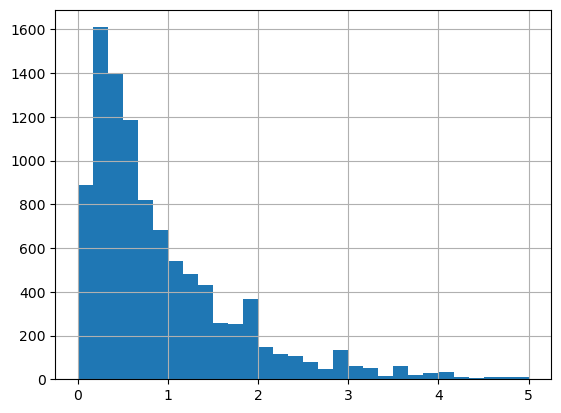

In [14]:
df_cat_window_sample.price_div_cat_average.hist(bins=30, range=[0, 5])

In [15]:
df_cat_window_sample.dtypes

category_code             object
price                    float64
price_by_categorycode    float64
price_div_cat_average    float64
dtype: object

In [16]:
df_cat_window_sample.head()

,category_code,price,price_by_categorycode,price_div_cat_average
0,computers.notebook,486.47,704.101398,0.690909
1,None,90.02,184.456724,0.488028
2,None,271.82,184.456724,1.473625
3,electronics.smartphone,308.63,497.398420,0.620489
4,None,34.88,184.456724,0.189096


In [17]:
df_cat_window_sample.price_div_cat_average.quantile(np.arange(0, 1.1, 0.1))

0.0     0.000000
0.1     0.181289
0.2     0.269020
0.3     0.374112
0.4     0.510840
0.5     0.648824
0.6     0.859581
0.7     1.129283
0.8     1.484504
0.9     2.098616
1.0    38.519336
Name: price_div_cat_average, dtype: float64

In [18]:
df_cat_window_sample[df_cat_window_sample.price_div_cat_average > 10].sort_values("price_div_cat_average", ascending=False)

,category_code,price,price_by_categorycode,price_div_cat_average
6856,appliances.environment.air_heater,1740.91,45.195743,38.519336
3515,appliances.iron,1750.34,94.144214,18.592114
9692,appliances.kitchen.microwave,1555.32,112.053070,13.880209
7091,None,2557.82,184.456724,13.866776
2391,None,2557.59,184.456724,13.865529
9715,None,2123.28,184.456724,11.510993
4681,None,2084.74,184.456724,11.302055
3956,appliances.kitchen.toster,549.28,49.075216,11.192615
3427,appliances.environment.air_heater,501.94,45.195743,11.105913
698,None,2033.50,184.456724,11.024266
